In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from thefuzz import process

In [3]:
# create enrollment count DF drop rows w/out building codes
df_sc1 = pd.read_csv("Hiring_Exercise_Files/Student Count File 19-20.csv")
df_sc2 = pd.read_csv("Hiring_Exercise_Files/Student Count File 20-21.csv")
df_sc3 = pd.read_csv("Hiring_Exercise_Files/Student Count File 21-22.csv")
df_sc4 = pd.read_csv("Hiring_Exercise_Files/Student Count File 22-23.csv")

df_school_count = pd.DataFrame()
frame1 = [df_sc1, df_sc2, df_sc3, df_sc4]

for df in frame1:
    df_school_count = df_school_count.append(df)

df_school_count = df_school_count[df_school_count['BuildingCode'].notna()]

In [4]:
# create school address DF drop rows w/out building codes

df_ee1 = pd.read_csv("Hiring_Exercise_Files/EEM File 19-20.csv")
df_ee2 = pd.read_csv("Hiring_Exercise_Files/EEM File 20-21.csv")
df_ee3 = pd.read_csv("Hiring_Exercise_Files/EEM File 21-22.csv")
df_ee4 = pd.read_csv("Hiring_Exercise_Files/EEM File 22-23.csv")


df_eem = pd.DataFrame()
frame2 = [df_ee1, df_ee2, df_ee3, df_ee4]

for df in frame2:
    df_eem = df_eem.append(df)
    
df_eem = df_eem[df_eem['BuildingCode'].notna()]

In [5]:
# merge city address with school count on district codes

df_city = df_eem[['DistrictCode', 'CITY']].drop_duplicates(subset='DistrictCode').reset_index(drop=True)

df_count = df_school_count.merge(df_city, how='left', on='DistrictCode')

df_count['SchoolYear'] = df_count['SchoolYear'].str.replace(' School Year','')

df_compare = df_count[['SchoolYear', 'CountyName', 'CITY', 'TOTAL_ENROLLMENT', 'EntityType']]

In [6]:
# create dataframes based on listed criteria

df_detroit = df_compare.loc[df_compare["CITY"]=="Detroit"]

df_psa = df_detroit.loc[df_detroit['EntityType']=='PSA School']
df_lea = df_detroit.loc[df_detroit['EntityType']=='LEA School']

df_group_psa = df_psa[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_psa['Percentage Change'] = round(df_group_psa['TOTAL_ENROLLMENT']/df_group_psa['TOTAL_ENROLLMENT'][0], 3)

df_group_lea = df_lea[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_lea['Percentage Change'] = round(df_group_lea['TOTAL_ENROLLMENT']/df_group_lea['TOTAL_ENROLLMENT'][0], 3)

df_wayne = df_compare.loc[df_compare["CountyName"]=="Wayne"]
df_group_wayne = df_wayne[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_wayne['Percentage Change'] = round(df_group_wayne['TOTAL_ENROLLMENT']/df_group_wayne['TOTAL_ENROLLMENT'][0], 3)

df_group_michigan = df_count[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_michigan['Percentage Change'] = round(df_group_michigan['TOTAL_ENROLLMENT']/df_group_michigan['TOTAL_ENROLLMENT'][0], 3)

In [7]:
print("Detroit Public School Enrollment")
print(df_group_psa)
print("")
print("")
print("Detroit Charter School Enrollment")
print(df_group_lea)
print("")
print("")
print("Wayne County School Enrollment")
print(df_group_wayne)
print("")
print("")
print("Michigan School Enrollment")
print(df_group_michigan)

Detroit Public School Enrollment
            TOTAL_ENROLLMENT  Percentage Change
SchoolYear                                     
19 - 20                34876              1.000
20 - 21                33053              0.948
21 - 22                32460              0.931
22 - 23                31918              0.915


Detroit Charter School Enrollment
            TOTAL_ENROLLMENT  Percentage Change
SchoolYear                                     
19 - 20                50515              1.000
20 - 21                48832              0.967
21 - 22                48220              0.955
22 - 23                48452              0.959


Wayne County School Enrollment
            TOTAL_ENROLLMENT  Percentage Change
SchoolYear                                     
19 - 20               271308              1.000
20 - 21               262647              0.968
21 - 22               260201              0.959
22 - 23               258926              0.954


Michigan School Enrollment
     

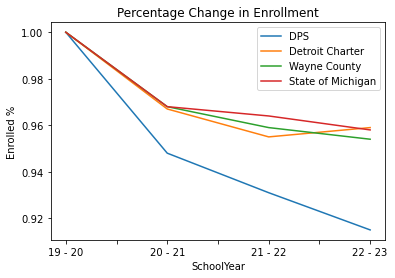

In [8]:
# graph grouped dataframe 

ax = df_group_psa['Percentage Change'].plot(legend=True)
bx = df_group_lea['Percentage Change'].plot(legend=True)
cx = df_group_wayne['Percentage Change'].plot(legend=True)
dx = df_group_michigan['Percentage Change'].plot(legend=True)

ax.legend(['DPS', 'Detroit Charter', 'Wayne County', 'State of Michigan'])

ax.set_ylabel('Enrolled %')
ax.set_title('Percentage Change in Enrollment')
ax
ax.figure.savefig('Images\school_enrollment.png')

In [9]:
# create datafram for feader patterns
df_slfp = pd.read_excel("Hiring_Exercise_Files/School List_Feeder Patterns.xlsx", engine='openpyxl')

In [10]:
# Limit dataframe to schooles located in Detroit and fuzzy match to merge HS Feeders to datafram

df_detroit_full = df_count[['SchoolYear', 'CountyName', 'CITY', 'TOTAL_ENROLLMENT',\
                            'EntityType','BuildingName', 'SchoolLevel']].loc[df_compare["CITY"]=="Detroit"]

best_name = lambda x: process.extractOne(x, df_slfp["schoolName"])[2]
df_detroit_full['High_School'] = df_slfp.loc[df_detroit_full["BuildingName"].map(best_name).values, 'HS Feeder'].values

In [11]:
# create list of schools names and replace with recognizable strings

sch_name_list = df_slfp['schoolName'].tolist()

sch_name_list2 = [names.replace('AL', 'A.L.') for names in sch_name_list]
sch_name_list3 = [names.replace('JR', 'R.') for names in sch_name_list2]
sch_name_list4 = [names.replace('EEVPA', 'Village') for names in sch_name_list3]
sch_name_list5 = [names.replace('Duke Ellington', 'Duke') for names in sch_name_list4]
sch_name_list6 = [names.replace('Fisher Lower', 'Fisher') for names in sch_name_list5]
sch_name_list7 = [names.replace('Ann Arbor', 'Arbor') for names in sch_name_list6]
sch_name_list8 = [names.replace('Brenda Scott', 'Brenda') for names in sch_name_list7]
sch_name_list9 = [names.replace('Coleman Young', 'Coleman') for names in sch_name_list8]
sch_name_list10 = [names.replace('Greenfield Union', 'Union') for names in sch_name_list9]
sch_name_list11 = [names.replace('Henry Ford', 'Henry') for names in sch_name_list10]
sch_name_list12 = [names.replace('Mark Twain', 'Twain') for names in sch_name_list11]
sch_name_list13 = [names.replace('Palmer Park', 'Palmer') for names in sch_name_list12]
sch_name_list14 = [names.replace('Ronald Brown', 'Ronald') for names in sch_name_list13]
sch_name_list15 = [names.replace('Sampson Webber', 'Sampson') for names in sch_name_list14]



In [47]:
# switch feeder schools that were applied to wroong highschool

df_feeder_schools = pd.DataFrame()

for name in sch_name_list15:
    df_feeder_schools = df_feeder_schools.append(df_detroit_full[df_detroit_full['BuildingName'].str.contains(name)])
df_feeder_schools = df_feeder_schools.loc[df_feeder_schools["EntityType"]=="LEA School"]

df_feeder_schools.loc[df_feeder_schools['BuildingName']=='East English Village Preparatory Academy at Finney']=\
df_feeder_schools.loc[df_feeder_schools['BuildingName']=='East English Village Preparatory Academy at Finney']\
.replace("WESTERN","EEVPA")

df_feeder_schools.loc[df_feeder_schools['BuildingName']=='Bow Elementary-Middle School']=\
df_feeder_schools.loc[df_feeder_schools['BuildingName']=='Bow Elementary-Middle School']\
.replace("WESTERN","FORD")

df_feeder_schools.loc[df_feeder_schools['BuildingName']=='Bagley Elementary School of Journalism and Technology']=\
df_feeder_schools.loc[df_feeder_schools['BuildingName']=='Bagley Elementary School of Journalism and Technology']\
.replace("WESTERN","MUMFORD")

df_feeder_schools = df_feeder_schools.drop(df_feeder_schools[df_feeder_schools['BuildingName']\
=='Davis Aerospace Technical High School at Golightly'].index)

In [48]:
#group by highschool and school year, add percentage change collumn

title = sorted(list(set(df_slfp['HS Feeder'].tolist())))

df_group = df_feeder_schools.groupby(['High_School','SchoolYear'])['TOTAL_ENROLLMENT'].sum()

df_group = df_group.reset_index()


perc_list = []

for titles in title:
    perc_list.append(round(df_group.loc[df_group['High_School']==titles]['TOTAL_ENROLLMENT']\
    /df_group.loc[df_group['High_School']==titles]['TOTAL_ENROLLMENT'].reset_index(drop=True)[0],3).tolist())

flat_perc = []

for in_list in perc_list:
    for element in in_list:
        flat_perc.append(element)
df_group["Percentage_Change"] = flat_perc

print(df_group.groupby(['High_School', 'SchoolYear']).sum())

                         TOTAL_ENROLLMENT  Percentage_Change
High_School  SchoolYear                                     
CENTRAL      19 - 20                 1398              1.000
             20 - 21                 1326              0.948
             21 - 22                 1238              0.886
             22 - 23                 1501              1.074
CODY         19 - 20                 6172              1.000
             20 - 21                 5722              0.927
             21 - 22                 5527              0.895
             22 - 23                 5658              0.917
DENBY        19 - 20                 3332              1.000
             20 - 21                 3214              0.965
             21 - 22                 2976              0.893
             22 - 23                 2961              0.889
EEVPA        19 - 20                 3178              1.000
             20 - 21                 2895              0.911
             21 - 22    

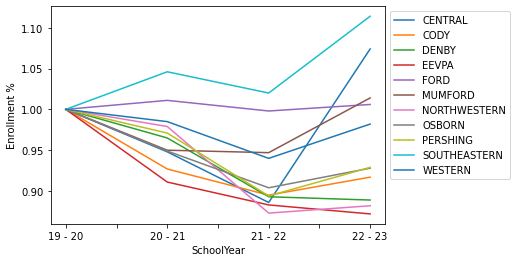

In [49]:
# create graph for each  feeder pattern

plot = ['ex','fx','gx','hx','ix','jx','kx','lx','mx','nx','ox']

title_plot = list(zip(title, plot))

for titles, plots in title_plot:
    plots = df_group.loc[df_group['High_School']==titles].drop(['High_School', 'TOTAL_ENROLLMENT'], axis=1).\
    groupby(by=["SchoolYear"]).sum()['Percentage_Change'].plot(legend=True, label=titles)
plt.ylabel('Enrollment %')
plt.legend(bbox_to_anchor=(1.0,1.0)).figure.savefig('Images\school_feeder.png')

In [59]:
#totals for feeder schools + graph
#df_group_full = df_feeder_schools.groupby(['SchoolYear'])['TOTAL_ENROLLMENT'].sum()
#df_group_full

df_group_full = df_feeder_schools[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_full['Percentage_Change'] = round(df_group_full['TOTAL_ENROLLMENT']/df_group_full['TOTAL_ENROLLMENT'][0], 3)
print(df_group_full)

            TOTAL_ENROLLMENT  Percentage_Change
SchoolYear                                     
19 - 20                39074              1.000
20 - 21                37753              0.966
21 - 22                36196              0.926
22 - 23                37581              0.962


In [ ]:
yx = df_group_full['Percentage_Change'].plot(legend=True)
yx.legend(['Total Enrollment'])

yx.set_ylabel('Enrolled %')
yx.set_title('Percentage Change in Enrollment')
yx

In [35]:
df_feeder_schools.loc[df_feeder_schools['High_School']=='SOUTHEASTERN']

,SchoolYear,CountyName,CITY,TOTAL_ENROLLMENT,EntityType,BuildingName,SchoolLevel,High_School
2966,19 - 20,Wayne,Detroit,503,LEA School,Bunche Preparatory Academy,Elem_Middle School,SOUTHEASTERN
6387,20 - 21,Wayne,Detroit,464,LEA School,Bunche Preparatory Academy,Elem_Middle School,SOUTHEASTERN
9818,21 - 22,Wayne,Detroit,416,LEA School,Bunche Preparatory Academy,Elem_Middle School,SOUTHEASTERN
13226,22 - 23,Wayne,Detroit,401,LEA School,Bunche Preparatory Academy,Elem_Middle School,SOUTHEASTERN
2961,19 - 20,Wayne,Detroit,326,LEA School,Blackwell Institute,Elem_Middle School,SOUTHEASTERN
6382,20 - 21,Wayne,Detroit,351,LEA School,Blackwell Institute,Elem_Middle School,SOUTHEASTERN
9814,21 - 22,Wayne,Detroit,297,LEA School,Blackwell Institute,Elem_Middle School,SOUTHEASTERN
13222,22 - 23,Wayne,Detroit,213,LEA School,Blackwell Institute,Elem_Middle School,SOUTHEASTERN
2976,19 - 20,Wayne,Detroit,128,LEA School,Chrysler Elementary School,Elementary,SOUTHEASTERN
6397,20 - 21,Wayne,Detroit,124,LEA School,Chrysler Elementary School,Elementary,SOUTHEASTERN
